# Random Forest Classification Model - Medical No Shows

This notebook assesses the feature relevance for Medical no shows using all of the available data in a Random Forest Classification Model. 

### Import Dependencies

In [1]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

### Load Dataset for modelling

In [2]:
data = pd.read_csv('../data/cleanData/appointment_dataset.csv')
print(f"Shape of the data is: {data.shape}")
data.head()

Shape of the data is: (110521, 29)


,appointment_id,patient_id,repeat_patient_yn,gender_yn,time_between_sch_appt,same_day_appt_yn,within_week_appt_yn,advanced_appt_yn,monday_yn,tuesday_yn,...,young_adult_yn,adult_yn,senior_yn,welfare_assistance,hypertension,diabetes,alcoholism,handicap_yn,sms_received,no_show_yn
0,5698125,678814354693913,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,5698246,54593736353128,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2,5699393,4369164743113,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,5694371,54523365344664,0,1,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,5698279,62917816238835,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


In [3]:
#check for nulls and verify that attributes for modelling are the correct datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110521 entries, 0 to 110520
Data columns (total 29 columns):
appointment_id                   110521 non-null int64
patient_id                       110521 non-null int64
repeat_patient_yn                110521 non-null int64
gender_yn                        110521 non-null int64
time_between_sch_appt            110521 non-null int64
same_day_appt_yn                 110521 non-null int64
within_week_appt_yn              110521 non-null int64
advanced_appt_yn                 110521 non-null int64
monday_yn                        110521 non-null int64
tuesday_yn                       110521 non-null int64
wednesday_yn                     110521 non-null int64
thursday_yn                      110521 non-null int64
friday_yn                        110521 non-null int64
saturday_yn                      110521 non-null int64
neighborhood_income_lower_yn     110521 non-null int64
neighborhood_income_middle_yn    110521 non-null int64
neigborho

### Drop irrelevent columns

In [4]:
clean_data = data.drop(['appointment_id', 'patient_id', 'time_between_sch_appt'], axis=1)

print(f"Shape of the data is: {clean_data.shape}")

Shape of the data is: (110521, 26)


### Pull our target column from the data and create a list of our outcome values

In [5]:
target = clean_data['no_show_yn']

### Drop the target column from our data 

In [6]:
data = clean_data.drop('no_show_yn', axis=1)
feature_names = data.columns
data.head()

,repeat_patient_yn,gender_yn,same_day_appt_yn,within_week_appt_yn,advanced_appt_yn,monday_yn,tuesday_yn,wednesday_yn,thursday_yn,friday_yn,...,child_yn,young_adult_yn,adult_yn,senior_yn,welfare_assistance,hypertension,diabetes,alcoholism,handicap_yn,sms_received
0,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


### Split the data into training and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

### Create a Random Forest Classifier and fit the training data and score with the test data

In [8]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")

Training Data Score: 0.8101097840511521
Testing Data Score: 0.792986138757193


### Make predictions

In [9]:
predictions = rf.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 1, 0, 0, 1, 0, 0, 0, 0, 0]


### View predictions along with their probabilities of being within each class

In [10]:
probs = rf.predict_proba(X_test)
pred_df = pd.DataFrame({
    "Prediction": predictions, 
    "Actual": y_test, 
    "P(Show)": [p[0] for p in probs], 
    "P(Noshow)": [p[1] for p in probs]
    }).reset_index(drop=True)

pred_df.head(10)

,Prediction,Actual,P(Show),P(Noshow)
0,0,0,0.886897,0.113103
1,0,1,0.769165,0.230835
2,0,0,0.770441,0.229559
3,0,0,0.680064,0.319936
4,0,1,0.840374,0.159626
5,0,0,0.969338,0.030662
6,0,0,0.929412,0.070588
7,0,0,1.000000,0.000000
8,0,0,0.761737,0.238263
9,0,0,0.605882,0.394118


### Create a Confusion Matrix

In [11]:
confusion_matrix(y_test,predictions)

array([[21568,   523],
       [ 5197,   343]])

### Label the Confusion Matrix

In [12]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True Neg: {tn}   False Pos: {fp}")
print(f"False Neg: {fn}  True Pos: {tp}")

True Neg: 21568   False Pos: 523
False Neg: 5197  True Pos: 343


### Plot Confusion Matrix of test data
Check out matrix of true positives, true negatives, false positives, and false negatives

Text(0.5, 1.0, 'Original Dataset Confusion Matrix')

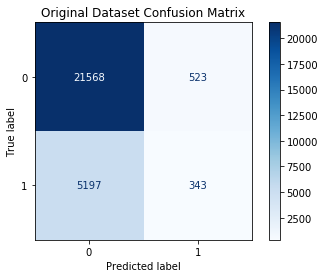

In [13]:
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues, values_format='.5g')
plt.title('Original Dataset Confusion Matrix')

In [14]:
# evaluate the model using model evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, predictions))

Accuracy: 0.792986138757193
Precision: 0.3960739030023095
Recall: 0.06191335740072202
Matthews Correlation Coefficient: 0.08786613096558017


### ROC Curve

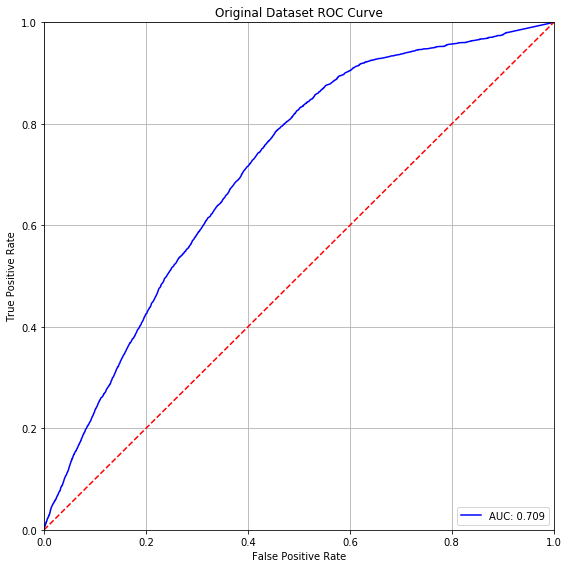

In [15]:
plt.figure(figsize=(8,8))
predictions_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions_proba)
auc = metrics.roc_auc_score(y_test, predictions_proba)
plt.title('Original Dataset ROC Curve')
plt.plot(fpr, tpr, 'b', label="AUC: {:.3f}".format(auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.tight_layout()

plt.savefig('ROC_RF_original.png')

plt.show()


### View features by importance

In [16]:
results = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
results

[(0.2264496066001097, 'same_day_appt_yn'),
 (0.1287542344234225, 'advanced_appt_yn'),
 (0.06909930790123903, 'gender_yn'),
 (0.0629711254309736, 'sms_received'),
 (0.06218612053612564, 'repeat_patient_yn'),
 (0.04269826530477741, 'within_week_appt_yn'),
 (0.040042378899222096, 'welfare_assistance'),
 (0.03910525471073082, 'diabetes'),
 (0.0358816535974877, 'hypertension'),
 (0.030016536226147635, 'handicap_yn'),
 (0.02822634735554026, 'alcoholism'),
 (0.02413559136719704, 'senior_yn'),
 (0.021291036940519308, 'wednesday_yn'),
 (0.020976798316673574, 'monday_yn'),
 (0.020803407728762987, 'tuesday_yn'),
 (0.01946478302405659, 'friday_yn'),
 (0.018445507489767157, 'neighborhood_income_lower_yn'),
 (0.017932592826880894, 'thursday_yn'),
 (0.017571738110905663, 'day_after_holiday_yn'),
 (0.016417838273186307, 'neigborhood_income_higher_yn'),
 (0.015385213567797784, 'young_adult_yn'),
 (0.014183282021011084, 'adult_yn'),
 (0.014150534165839956, 'neighborhood_income_middle_yn'),
 (0.012568504

In [17]:
RFresults_df = pd.DataFrame(results, columns=['feature_importances','feature_names'])
RFresults_df = RFresults_df.sort_values(by='feature_importances', ascending=False)
RFresults_df

,feature_importances,feature_names
0,0.226450,same_day_appt_yn
1,0.128754,advanced_appt_yn
2,0.069099,gender_yn
3,0.062971,sms_received
4,0.062186,repeat_patient_yn
5,0.042698,within_week_appt_yn
6,0.040042,welfare_assistance
7,0.039105,diabetes
8,0.035882,hypertension
9,0.030017,handicap_yn


### Export model results to csv

In [18]:
RFresults_df.to_csv('../data/cleanData/modelResults/RFresults.csv', index = False, header=True)

In [19]:
RFresults_df=RFresults_df.set_index('feature_names')

RFresults_df

,feature_importances
feature_names,
same_day_appt_yn,0.226450
advanced_appt_yn,0.128754
gender_yn,0.069099
sms_received,0.062971
repeat_patient_yn,0.062186
within_week_appt_yn,0.042698
welfare_assistance,0.040042
diabetes,0.039105
hypertension,0.035882


### Plot Feature Importance

<Figure size 432x288 with 0 Axes>

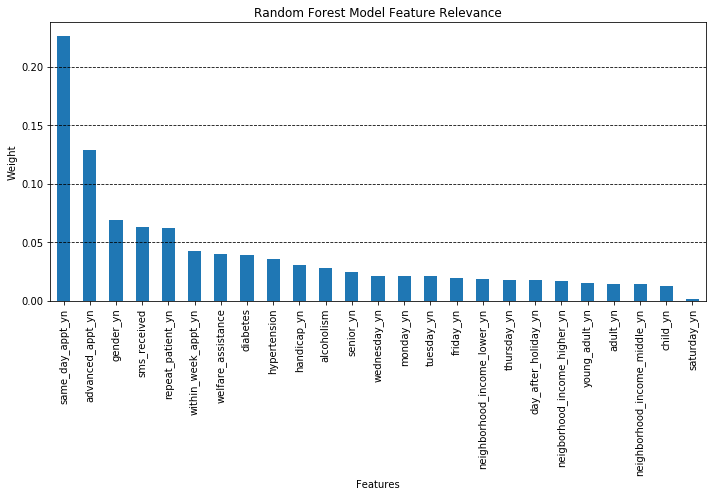

In [20]:
plt.figure()
RFresults_df.plot(kind="bar", legend=False, figsize=(10, 7))
plt.title("Random Forest Model Feature Relevance")
plt.ylabel("Weight")
plt.xlabel("Features")
# plt.yscale("log")
plt.grid(axis="y", color="k", linestyle="--")
plt.tight_layout()
plt.savefig("feature_relevance_RF_original.png")

plt.show()
